In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [6]:
root = 'https://raw.githubusercontent.com/LearnDataSci/article-resources/master/Housing%20Price%20Index%20Regression'

housing_price_index = pd.read_csv(root + '/monthly-hpi.csv')
unemployment = pd.read_csv(root + '/unemployment-macro.csv')
federal_funds_rate = pd.read_csv(root + '/fed_funds.csv')
shiller = pd.read_csv(root + '/shiller.csv')
gross_domestic_product = pd.read_csv(root + '/gdp.csv')

In [7]:
# merge dataframes into single dataframe by date
df = (shiller.merge(housing_price_index, on='date').merge(unemployment, on='date').merge(federal_funds_rate, on='date').merge(gross_domestic_product, on='date'))

In [8]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [9]:
print(df)

          date    sp500  consumer_price_index  long_interest_rate  \
0   2011-01-01  1282.62                220.22                3.39   
1   2011-04-01  1331.51                224.91                3.46   
2   2011-07-01  1325.19                225.92                3.00   
3   2011-10-01  1207.22                226.42                2.15   
4   2012-01-01  1300.58                226.66                1.97   
5   2012-04-01  1386.43                230.09                2.05   
6   2012-07-01  1359.78                229.10                1.53   
7   2012-10-01  1437.82                231.32                1.75   
8   2013-01-01  1480.40                230.28                1.91   
9   2013-04-01  1570.70                232.53                1.76   
10  2013-07-01  1668.68                233.60                2.58   
11  2013-10-01  1720.03                233.55                2.62   
12  2014-01-01  1822.36                233.92                2.86   
13  2014-04-01  1864.26           

In [10]:
print(shiller)

          date    sp500  consumer_price_index  long_interest_rate
0   2010-11-01  1198.89                218.80                2.76
1   2010-12-01  1241.53                219.18                3.29
2   2011-01-01  1282.62                220.22                3.39
3   2011-02-01  1321.12                221.31                3.58
4   2011-03-01  1304.49                223.47                3.41
..         ...      ...                   ...                 ...
65  2016-04-01  2075.54                239.26                1.81
66  2016-05-01  2065.55                240.24                1.81
67  2016-06-01  2083.89                241.04                1.64
68  2016-07-01  2148.90                240.65                1.50
69  2016-08-01  2187.02                240.45                1.57

[70 rows x 4 columns]


In [11]:
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

# summarize our model
housing_model_summary2 = housing_model.summary()



In [12]:
housing_model_summary2 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Mon, 06 Jun 2022   Prob (F-statistic):           2.71e-15
Time:                         18:26:40   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


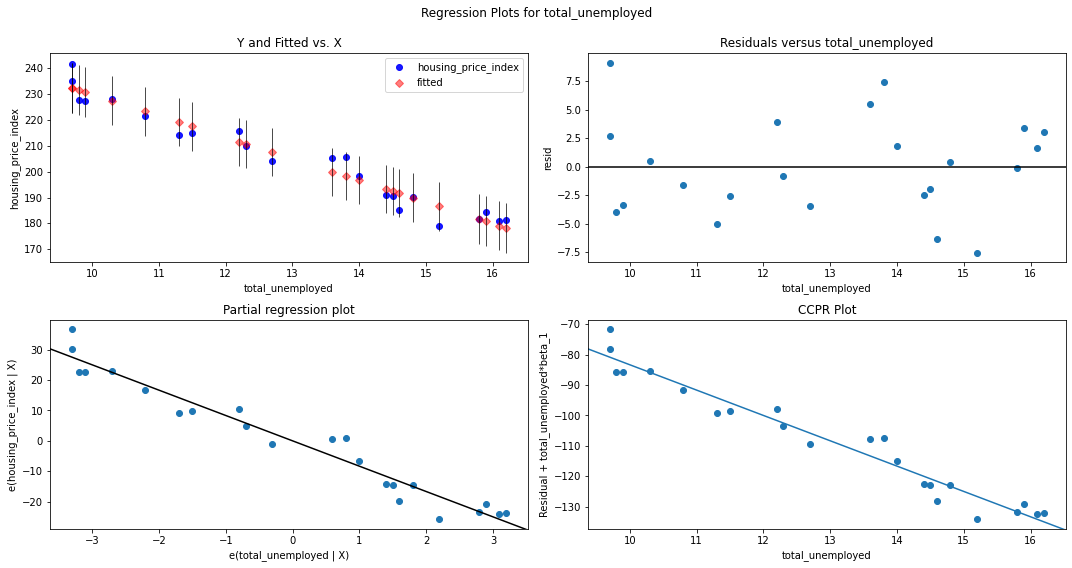

In [17]:
# This produces our four regression plots for total_unemployed
#matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)[source]

fig = plt.figure(figsize=(15,8))
#plt.figure?
# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed",fig=fig)


In [14]:
 #fit our model with .fit() and show results

#  we write out the formula using ~
housing_model2 = ols("housing_price_index ~ sp500", data=df).fit()

# summarize our model
housing_model_summary3 = housing_model2.summary()
housing_model_summary3

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.922
Model:                             OLS   Adj. R-squared:                  0.919
Method:                  Least Squares   F-statistic:                     250.0
Date:                 Mon, 06 Jun 2022   Prob (F-statistic):           3.89e-13
Time:                         18:26:41   Log-Likelihood:                -70.872
No. Observations:                   23   AIC:                             145.7
Df Residuals:                       21   BIC:                             148.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.0642      6.298     17.001      0.000      93.967     120.161
sp500          0.0577      0.004     15.810      0.000       0.050       0.065
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.531
Skew:                           0.291   Prob(JB):                        0.767
Kurtosis:                       2.536   Cond. No.                     9.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""